In [22]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
import numpy as np
import SHSsimulate as shssim
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# parameter values:
R=50.
toff =10
k=20.
p=0.05
v0 =1.
delta=0.1
sigma=0.01

# define the SHS

# shs states x=(b1,b2,b3,v)
x = shssim.vararray('x',4) 

# drift terms
f = shssim.polyarr([0,0,0,x[0]*((np.log(2)/R)*x[3]+delta)+x[1]/R]) 

# diffussion terms
g=shssim.polyarr([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,sigma*x[1]*x[3]]]) 

# reset intensities
lam_drop=(p/R)*(x[0]+x[1])*x[3]
lam_start=x[2]/toff
lam_end=(x[0]+x[1])*x[3]/(k*R)

Lam = [lam_drop,lam_start,lam_end]

# reset maps
phi_drop=shssim.polyarr([0,x[0]+x[1],0,0.5*x[0]*x[3]+0.5*x[1]*x[3]])
phi_start=shssim.polyarr([x[2],0,0,v0*x[2]])
phi_end=shssim.polyarr([0,0,x[0]+x[1],0])

Phi = [phi_drop,phi_start,phi_end]

# define SHS
shs = shssim.singleModeSHS(x,f=f,g=g,Lam=Lam,Phi=Phi)

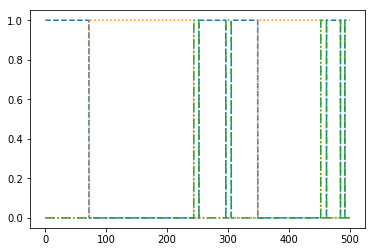

In [45]:
# Lets check one sample trajectory
Time = np.linspace(0,500,10000)
x0 = [1,0,0,1] # initial condition. note that b1+b2+b3=1.
X = shs.simulate(Time,x0)
plt.plot(Time,X[:,0],'--')
plt.plot(Time,X[:,1],':')
plt.plot(Time,X[:,2],'-.')

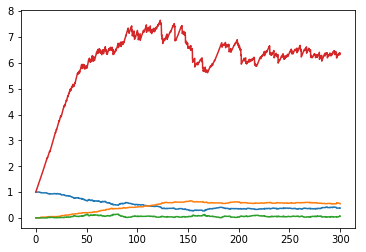

In [176]:
NumRuns = 100
Time = np.linspace(0,300,3000)

XRuns = np.zeros((NumRuns,len(Time),4))

for run in range(NumRuns):
    XRuns[run,:] = shs.simulate(Time,x0).squeeze()
    
XMeanSq = np.mean(XRuns,axis=0)
plt.plot(Time,XMeanSq)

In [20]:
plt.plot(Time,XMeanSq[:,1])

NameError: name 'XMeanSq' is not defined